# Prepare the Data

### 1. Run the provided package dependency and data imports, and then merge the mouse_metadata and study_results DataFrames into a single DataFrame.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
metadata = pd.read_csv('./data/Mouse_metadata.csv')
results = pd.read_csv('./data/Study_results.csv')

In [3]:
metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
data = pd.merge(metadata, results, on='Mouse ID')
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### 2. Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. Display the data associated with that mouse ID, and then create a new DataFrame where this data is removed.

In [6]:
data['Mouse ID'].nunique()

249

In [7]:
df = pd.DataFrame(data, columns = ['Mouse ID', 'Timepoint'])
duplicate = df[df.duplicated()]
duplicate

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [8]:
duplicate_mouse_ids = data.loc[data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_data = data[data['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### 3. Display the updated number of unique mice IDs.

In [9]:
clean_data['Mouse ID'].nunique()

248

# Generate Summary Satistics

In [10]:
mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

In [11]:
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

In [12]:
varinaza = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

In [13]:
st_dev = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

In [14]:
st_err = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [15]:
tumor_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': varinaza,
    'Standar Deviation': st_dev,
    'Standar Error': st_err
})

tumor_df

,Mean,Median,Variance,Standar Deviation,Standar Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Create Bar Charts and Pie Charts

1. Generate two bar charts. Both charts should be identical and show the total total number of rows (Mouse ID/Timepoints) for each drug regimen throughout the study.

- Create the first bar chart with the Pandas DataFrame.plot() method.

- Create the second bar chart with Matplotlib's pyplot methods.

In [16]:
counts = clean_data['Drug Regimen'].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [17]:
labels = counts.index
y_values = counts.values

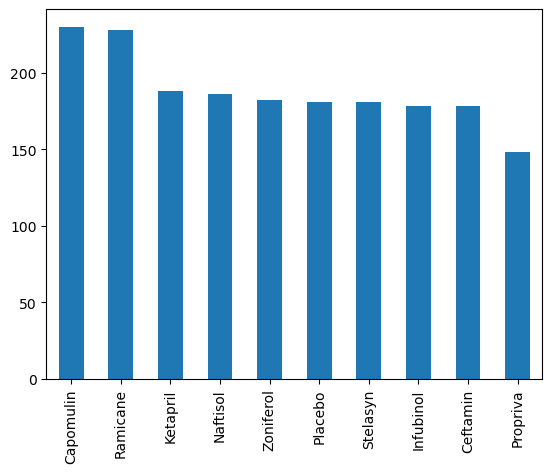

In [18]:
#Plotting with Pandas
counts.plot(kind='bar')
plt.show()

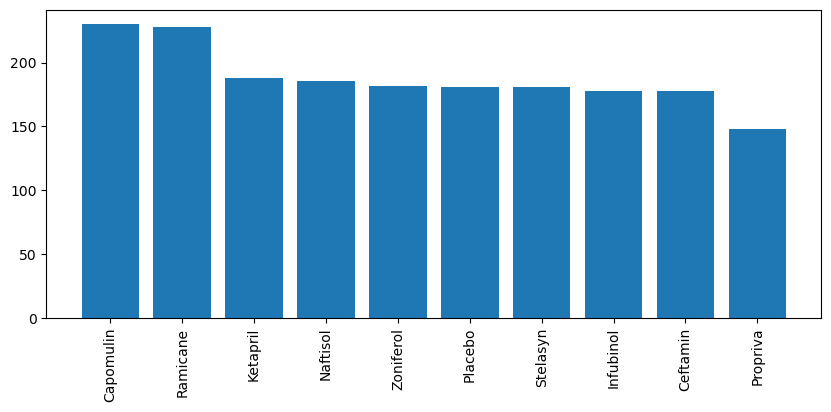

In [19]:
# Plotting with Matplotlib
plt.figure(figsize=[10,4])
plt.bar(labels, y_values)
plt.xticks(rotation='vertical')

plt.show()

## Male VS Female
2. Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.

- Create the first pie chart with the Pandas DataFrame.plot() method.

- Create the second pie chart with Matplotlib's pyplot methods.

In [20]:
# Matplotlib
mice_gender = clean_data['Sex'].unique()
mice_amount = clean_data['Sex'].value_counts()

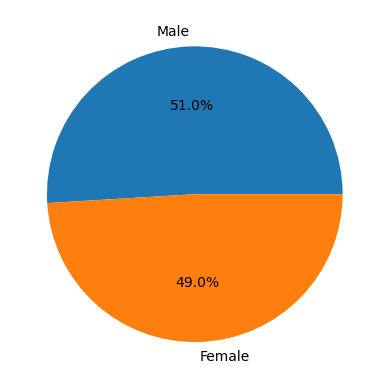

In [21]:
labels = mice_gender
sizes = mice_amount

plt.pie(sizes, labels=labels, autopct = '%1.1f%%')
plt.show()

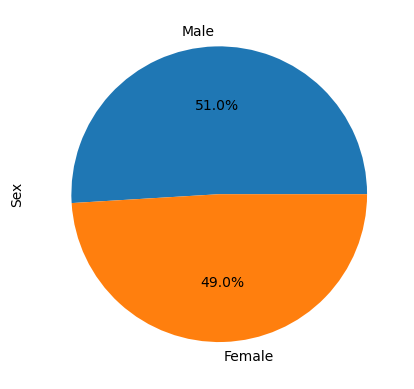

In [22]:
# Pandas
sex_counts = clean_data['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct = '%1.1f%%')
plt.show()

## Calculate Quartile, Find Outliers, and Create a Box Plot

In [23]:
new_df = clean_data.groupby('Mouse ID')['Timepoint'].max()
new_df.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [24]:
new_merged_df = clean_data.merge(new_df, on=['Mouse ID', 'Timepoint'], how='right')
new_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [25]:
final_tumor = new_merged_df.loc[new_merged_df['Drug Regimen']== 'Infubinol','Tumor Volume (mm3)']
low_q = final_tumor.quantile(.25)
upper_q = final_tumor.quantile(.75)
upper_q
iqr = upper_q - low_q
upper_bound = upper_q + 1.5*iqr
lower_bound = low_q - 1.5*iqr
outliers = final_tumor.loc[(final_tumor <lower_bound) | (final_tumor>upper_bound)]
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_data = []
for x in drug_list:
    print(x)
    final_tumor = new_merged_df.loc[new_merged_df['Drug Regimen']== x,'Tumor Volume (mm3)']
    low_q = final_tumor.quantile(.25)
    upper_q = final_tumor.quantile(.75)
    upper_q
    iqr = upper_q - low_q
    upper_bound = upper_q + 1.5*iqr
    lower_bound = low_q - 1.5*iqr
    outliers = final_tumor.loc[(final_tumor <lower_bound) | (final_tumor>upper_bound)]
    print('Outliers are:', outliers)
    tumor_data.append(final_tumor)
    tumor_data

Capomulin
Outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
Outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
Outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [26]:
tumor_data

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

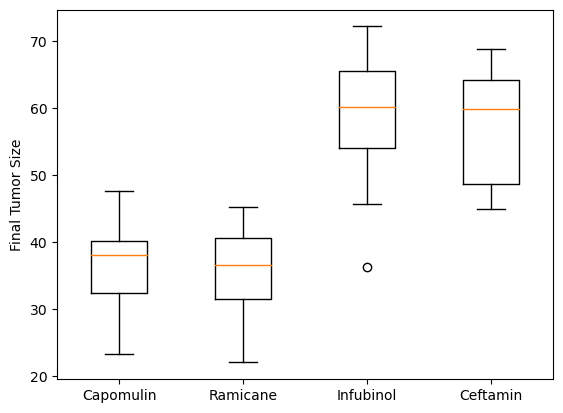

In [27]:
plt.boxplot(tumor_data, labels=drug_list)
plt.ylabel('Final Tumor Size')
plt.show()

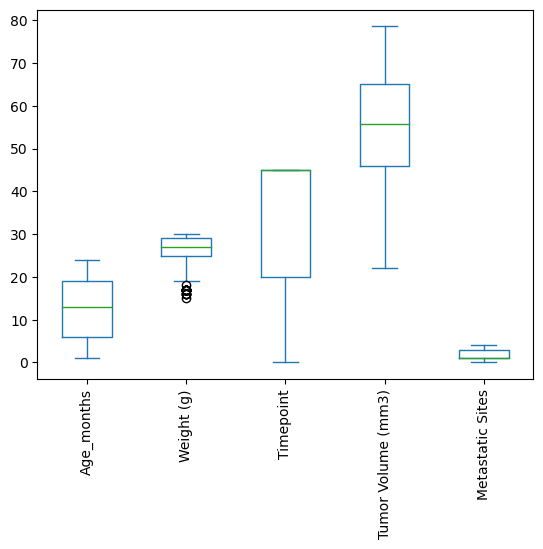

In [28]:
new_merged_df.plot.box()
plt.xticks(rotation='vertical')
plt.show()

# Create a Line Plot and a Scatter Plot

### 1. Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.

In [29]:
Capomulin = new_merged_df[(new_merged_df['Drug Regimen'] == 'Capomulin')]
Capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,b128,Capomulin,Female,9,22,45,38.982878,2
24,b742,Capomulin,Male,7,21,45,38.939633,0
61,f966,Capomulin,Male,16,17,20,30.485985,0
64,g288,Capomulin,Male,3,19,45,37.074024,1
66,g316,Capomulin,Female,22,22,45,40.159220,2


In [30]:
mouse_c = data[(data['Mouse ID'] == 's185')]
mouse_c

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


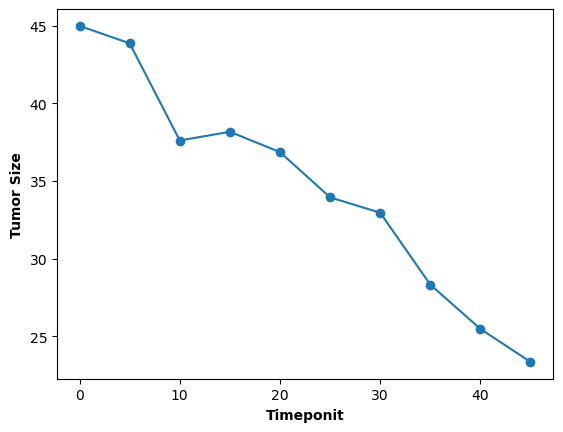

In [31]:
y_axis = mouse_c['Tumor Volume (mm3)']
labels_mc = mouse_c['Timepoint']

plt.plot(labels_mc, y_axis, marker='o')
plt.ylabel('Tumor Size', weight='bold')
plt.xlabel('Timeponit', weight='bold')
plt.show()

### 2. Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen.

In [32]:
m_tumor = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
m_tumor

Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [33]:
m_weight = Capomulin.groupby('Mouse ID')['Weight (g)'].mean()
m_weight

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

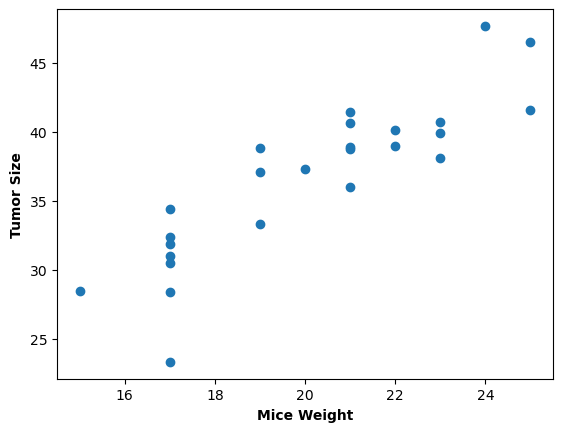

In [34]:
plt.scatter(m_weight, m_tumor)
plt.ylabel('Tumor Size', weight='bold')
plt.xlabel('Mice Weight', weight='bold')
plt.show()

In [35]:
x_values = m_weight
y_values = m_tumor

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

In [36]:
linregress(x_values, y_values)

LinregressResult(slope=1.7504682289585034, intercept=1.4481469525549073, rvalue=0.8767060403658117, pvalue=9.084429088673363e-09, stderr=0.20026513236453652, intercept_stderr=4.068291402922095)

In [37]:
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} X'
line_eq

'y = 1.45 + 1.75 X'

In [40]:
intercept + (slope* 20)

36.457511531724975

In [43]:
y_predict = intercept + (slope* x_values)

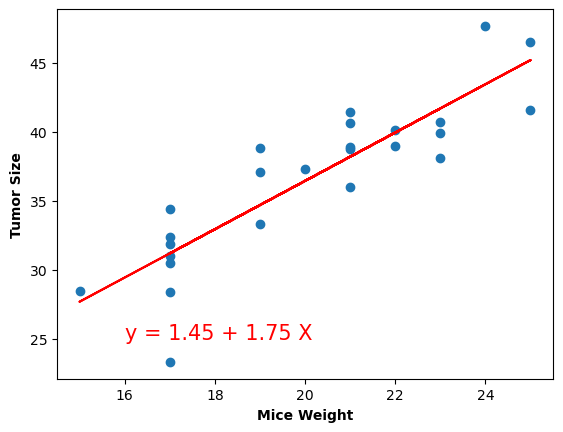

In [48]:
plt.scatter(x_values,y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (16,25), color='r', fontsize=15)
plt.ylabel('Tumor Size', weight='bold')
plt.xlabel('Mice Weight', weight='bold')
plt.show()